<a href="https://colab.research.google.com/github/Cynamon224/Zadania_z-_sieci_neuronowych/blob/main/LogisticRegressionTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Census Income
This is a Sci-Kit Learn + Pandas example of classification problem. The dataset comes from http://archive.ics.uci.edu/. 

Data extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). The data was also preprocessed for the purpose of this example.

Prediction task is to determine whether a person makes over 50K a year.


### List of attributes:

##### Features
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



##### Labels
- income - >50K, <=50K. 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
# Uncomment this if you are using Google Colab
!wget https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LogisticRegressionCensus/census.csv

--2022-03-23 09:28:35--  https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LogisticRegressionCensus/census.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3152687 (3.0M) [text/plain]
Saving to: ‘census.csv’

census.csv          100%[===================>]   3.01M  --.-KB/s    in 0.01s   

2022-03-23 09:28:35 (267 MB/s) - ‘census.csv’ saved [3152687/3152687]



### Load dataset

In [ ]:
df = pd.read_csv("./census.csv")

print (df.shape)
print (df.columns)
df.head(20)

(32561, 12)
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


## Task 1 - Initial analysis
Perform initial analysis to understand the data.

In [ ]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

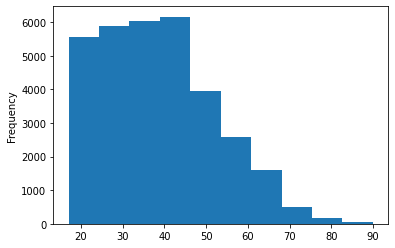

In [ ]:
df['age'].plot.hist()

In [ ]:
print(df['education-num'])

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: education-num, Length: 32561, dtype: int64


## Task 2 - Preparing data
- Select features `X` and labels `y`. Make sure that your selection makes sense.
- Change the data into a numerical form to let your algorithm (logistic regression) deal with them
- Perform One-hot encoding if necessary
- Split your data into train and test subsets. Make sure that your split is reasonable. Use `stratify` if you consider it helpful.

In [ ]:
df.rename(columns = {'marital-status' : 'maritalStatus', 'native-country' : 'nativeCountry'}, inplace = True)

In [ ]:
df['workclass']=pd.factorize(df.workclass)[0]
#df['education']=pd.factorize(df.education)[0]
df['maritalStatus']=pd.factorize(df.maritalStatus)[0]
df['occupation']=pd.factorize(df.occupation)[0]
df['relationship']=pd.factorize(df.relationship)[0]
df['race']=pd.factorize(df.race)[0]
df['sex']=pd.factorize(df.sex)[0]
df['nativeCountry']=pd.factorize(df.nativeCountry)[0]
df['income']=pd.factorize(df.income)[0]

In [ ]:
df.head()

,age,workclass,education,education-num,maritalStatus,occupation,relationship,race,sex,hours-per-week,nativeCountry,income
0,39,0,Bachelors,13,0,0,0,0,0,40,0,0
1,50,1,Bachelors,13,1,1,1,0,0,13,0,0
2,38,2,HS-grad,9,2,2,0,0,0,40,0,0
3,53,2,11th,7,1,2,1,1,0,40,0,0
4,28,2,Bachelors,13,1,3,2,1,1,40,1,0


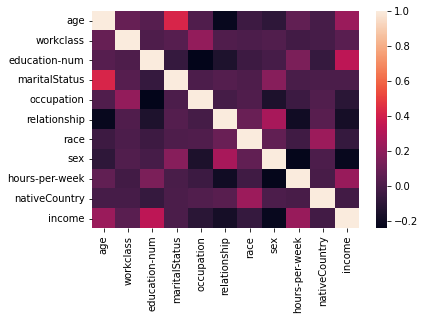

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  from ipykernel import kernelapp as app


,age,workclass,education-num,maritalStatus,occupation,relationship,race,sex,hours-per-week,nativeCountry,income
age,1.00,0.08,0.04,0.42,0.02,-0.22,-0.04,-0.09,0.07,-0.01,0.23
workclass,0.08,1.00,0.01,0.04,0.22,0.02,0.01,0.02,-0.03,-0.01,0.05
education-num,0.04,0.01,1.00,-0.07,-0.24,-0.14,-0.04,-0.01,0.15,-0.07,0.34
maritalStatus,0.42,0.04,-0.07,1.00,0.01,0.03,0.01,0.18,-0.00,0.00,0.00
occupation,0.02,0.22,-0.24,0.01,1.00,-0.02,0.02,-0.15,-0.05,0.02,-0.10
relationship,-0.22,0.02,-0.14,0.03,-0.02,1.00,0.10,0.27,-0.18,0.04,-0.17
race,-0.04,0.01,-0.04,0.01,0.02,0.10,1.00,0.07,-0.03,0.24,-0.07
sex,-0.09,0.02,-0.01,0.18,-0.15,0.27,0.07,1.00,-0.23,0.01,-0.22
hours-per-week,0.07,-0.03,0.15,-0.00,-0.05,-0.18,-0.03,-0.23,1.00,-0.01,0.23
nativeCountry,-0.01,-0.01,-0.07,0.00,0.02,0.04,0.24,0.01,-0.01,1.00,-0.03


In [ ]:
y=df['income']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64

In [ ]:
x=df[['workclass','education-num','maritalStatus']]
x=pd.get_dummies(x,columns=['workclass','maritalStatus'])



x.head()

,education-num,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,maritalStatus_0,maritalStatus_1,maritalStatus_2,maritalStatus_3,maritalStatus_4,maritalStatus_5,maritalStatus_6
0,13,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,13,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,13,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
x.rename(columns = {'workclass_5' : 'workclassINNE'}, inplace = True)
x['workclassINNE']=x['workclassINNE']+x['workclass_7']+x['workclass_8']
x.workclassINNE.value_counts()

0    30704
1     1857
Name: workclassINNE, dtype: int64

In [ ]:
x=x.drop("workclass_7",axis=1)
x=x.drop('workclass_8',axis=1)
x.head()

,education-num,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclassINNE,workclass_6,maritalStatus_0,maritalStatus_1,maritalStatus_2,maritalStatus_3,maritalStatus_4,maritalStatus_5,maritalStatus_6
0,13,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,13,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,13,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify = y, random_state = 1)

print ('X train shape:', X_train.shape)
print ('X test shape:', X_test.shape)
print ('y train shape:', y_train.shape)
print ('y test shape:', y_test.shape)

X train shape: (24420, 15)
X test shape: (8141, 15)
y train shape: (24420,)
y test shape: (8141,)


## Task 4 - Logistic Regression
Train and test a logistic regression model. If you want to get a maximum score you must be sure that your model:
- Do not overfit
- Do not underfit
- Achieves at least 80% accuracy on the test subset.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


print ('Model trained!')

Model trained!


In [ ]:
print ('R2 train score:', model.score(X_train, y_train))
print ('R2 test score:', model.score(X_test, y_test))

R2 train score: 0.8233005733005733
R2 test score: 0.8201695123449207


## Task 5 - Precision and recall
- Compute precision and recall for your model, for both, train and test subsets.
- Make sure that you understand these metrics, you may be asked to explain the meaning of it.

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(X_train)
y_predt = model.predict(X_test)


In [ ]:
 print("Precision score test",precision_score(y_test, y_predt))
 print("Precision score train",precision_score(y_train, y_pred))



Precision score test 0.6878787878787879
Precision score train 0.7011819116135662


In [ ]:
 print("Recall score test",recall_score(y_test, y_predt))
 print("Recall score  train",recall_score(y_train, y_pred))

Recall score test 0.463265306122449
Recall score  train 0.46403672844754296


In [ ]:
print(x.columns)

Index(['education-num', 'workclass_0', 'workclass_1', 'workclass_2',
       'workclass_3', 'workclass_4', 'workclassINNE', 'workclass_6',
       'maritalStatus_0', 'maritalStatus_1', 'maritalStatus_2',
       'maritalStatus_3', 'maritalStatus_4', 'maritalStatus_5',
       'maritalStatus_6'],
      dtype='object')


## Task 6: Applying the model
Use your model to check if you will earn above 50,000$ per year. Check both the response from the model (true/false) and the probability that the response will be true. Check using the data about yourself:
- right now
- two years from now
- ten years from now

In [ ]:
from sklearn.datasets import make_blobs

Xteraz=[[9,1,0,0,0,0,0,0,0,0,0,0,1,0,0]]
XzaDwa=[[13,0,0,0,0,1,0,0,0,0,0,0,1,0,0]]
Xza10=[[14,1,0,0,0,0,0,0,0,1,0,0,0,0,0]]

yteraz=model.predict(Xteraz)
yzaDwa=model.predict(XzaDwa)
yza10=model.predict(Xza10)

probsTeraz = model.predict_proba(Xteraz)
probsZaDwa = model.predict_proba(XzaDwa)
probsZa10 = model.predict_proba(Xza10)

print("teraz",probsTeraz,yteraz)
print("Za dwa lata",probsZaDwa,yzaDwa)
print("Za 10 lat",probsZa10,yza10)


teraz [[0.96951853 0.03048147]] [0]
Za dwa lata [[0.83474122 0.16525878]] [0]
Za 10 lat [[0.28028757 0.71971243]] [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X 